In [1]:
"""CODE: DELORIAN: ORBIT CALCULATOR.

AUTHOR: MATIAS BLAÑA D.(main dev.), ROY BUSTOS (dev. Setup
        Malin1-extragalactic).

LOCATION: CHILE, SANTIAGO NOVEMBER 2023.

VERSION: (v1.1) ORBIT CALCULATOR FOR MW DWARF SATELLITES INCLUDING MW MULTIPLE
         POTENTIALS and M31, AND Fornax Cluster potentials, WITH ORBITS WITH
         COSMIC EXPANSION OPTIONS.

SCRIPT: EXAMPLES OF WORKSCRIPTS FOR USERS THAT LOADS STORED INITIAL CONDITIONS,
        INTEGRATIONS ROUTINES, DEFINE OBSERVABLES, ETC.

REFERENCES: PLEASE CITE THE ARTICLE WHERE DELOREAN WAS ORIGINALY PUBLISHED:
            Blaña et al. 2020, MNRAS, 497,3601-3622

URL: https://ui.adsabs.harvard.edu/abs/2020MNRAS.497.3601B/abstract
"""


'CODE: DELORIAN: ORBIT CALCULATOR.\n\nAUTHOR: MATIAS BLAÑA D.(main dev.), ROY BUSTOS (dev. Setup\n        Malin1-extragalactic).\n\nLOCATION: CHILE, SANTIAGO NOVEMBER 2023.\n\nVERSION: (v1.1) ORBIT CALCULATOR FOR MW DWARF SATELLITES INCLUDING MW MULTIPLE\n         POTENTIALS and M31, AND Fornax Cluster potentials, WITH ORBITS WITH\n         COSMIC EXPANSION OPTIONS.\n\nSCRIPT: EXAMPLES OF WORKSCRIPTS FOR USERS THAT LOADS STORED INITIAL CONDITIONS,\n        INTEGRATIONS ROUTINES, DEFINE OBSERVABLES, ETC.\n\nREFERENCES: PLEASE CITE THE ARTICLE WHERE DELOREAN WAS ORIGINALY PUBLISHED:\n            Blaña et al. 2020, MNRAS, 497,3601-3622\n\nURL: https://ui.adsabs.harvard.edu/abs/2020MNRAS.497.3601B/abstract\n'

In [2]:
import sys
import numpy as np
sys.path.append('Code')

from DELOREAN_v1 import *


directory  /home/javier/Documentos/GitHub/TTB2024
 
DELOREAN LOADED WITH 1.21GW: GODSPEED USER
             _           _           
    ________|_\         /_|________  
    \_______-''=.     .=''-_______/  
               \\    //             
           _____\\__//_____         
         .'                '.        
       _'______________.- -._'_      
      /  _____________________ \     
      |/[_][_]____DMC___[_][_]\|     
      \___<_>____________<_>___/     
      |\___================___/|     
      |__|'                '|__|     
                                     


In [3]:
####################################################################
# Globular clusters of interest: NGC 5694, NGC 5824,
# NGC 6229, NGC 7006, NGC 7492, Pal 13, Whiting 1 y Munoz 1
#
# CLUSTER        RA           DEC			R☉               V_r
#  NAME          [°]          [°]		   [kpc]          [km/sec]
# NGC 5694   219.901245   -26.538776   34.84 ± 0.74   -139.55 ± 0.49
# NGC 5824   225.994156   -33.068138   31.71 ± 0.60    -25.24 ± 0.52
# NGC 6229   251.745249	  +47.527796   30.11 ± 0.47   -137.89 ± 0.71
# NGC 7006   315.372626	  +16.187323   39.32 ± 0.56   -383.47 ± 0.73
# NGC 7492	 347.111170   -15.611469   24.39 ± 0.57   -176.70 ± 0.27
# Pal 13  	 346.685190    12.771539   23.48 ± 0.40     25.30 ± 0.22
# Whiting 1   30.737499    -3.252778   30.59 ± 1.17   -130.41 ± 1.79
# Munoz 1	 15.0300056   66.9686944      45 ± 5 	 	 -137 ± 4
#
# CLUSTER       μ_α*cosδ          μ_δ                  Mass
#  NAME         [mas/yr]        [mas/yr]               [M☉]
# NGC 5694   -0.476 ± 0.012   -1.102 ± 0.011   3.83 ± 0.38 * 10**5
# NGC 5824   -1.193 ± 0.010	  -2.228 ± 0.009   7.79 ± 0.42 * 10**5
# NGC 6229   -1.156 ± 0.017	  -0.461 ± 0.018   2.91 ± 0.94 * 10**5
# NGC 7006   -0.115 ± 0.010	  -0.619 ± 0.009   2.29 ± 0.82 * 10**5
# NGC 7492	  0.777 ± 0.011	  -2.321 ± 0.011   2.58 ± 0.77 * 10**4
# Pal 13  	  1.740 ± 0.039	   0.116 ± 0.032   2.74 ± 1.45 * 10**4
# Whiting 1  -0.244 ± 0.051	  -2.019 ± 0.042   1.37 ± 0.27 * 10**3
# Munoz 1
####################################################################


In [4]:
"""EXAMPLE 1: Calculate orbits in a Static Milky Way potential."""

back_in_time = -5000  # Myr
testorbit11 = StarCluster()
testorbit11.name = 'Testorbit11'
testorbit11.ncpu = 2
testorbit11.setup = MySetup(setup_name='Setup:Blana2020', case='case1').setup
testorbit11.coordtype = 'Equatorial'
testorbit11.usebaumgardtcoord = True
testorbit11.orbprop = True
testorbit11.paramtime = [0, back_in_time, 0.05]  # t_init, t_fin, dt

# Initial conditions for NGC 5694
ra, dec, dist, vlos, pmac, pmd = (219.901, -26.539, 34.84,
                                  -139.55, -0.464, -1.105)
testorbit11.paramvars = [[ra, dec, dist, vlos, pmac, pmd]]
# Initial conditions for NGC 5824
ra, dec, dist, vlos, pmac, pmd = (225.994, -33.068, 31.71,
                                  -25.24, -1.189, -2.234)
testorbit11.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 6229
ra, dec, dist, vlos, pmac, pmd = (251.745, 47.528, 30.11,
                                  -138.64, -1.171, -0.467)
testorbit11.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7006
ra, dec, dist, vlos, pmac, pmd = (315.372, 16.187, 39.32,
                                  -383.47, -0.128, -0.633)
testorbit11.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7492
ra, dec, dist, vlos, pmac, pmd = (347.111, -15.611, 24.39,
                                  -176.70, 0.756, -2.320)
testorbit11.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Pal 13
ra, dec, dist, vlos, pmac, pmd = (346.685, 12.772, 23.48,
                                  25.87, 1.748, 0.104)
testorbit11.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Whiting 1
ra, dec, dist, vlos, pmac, pmd = (30.737, -3.253, 30.59,
                                  -130.41, -0.228, -2.046)
testorbit11.paramvars.append([ra, dec, dist, vlos, pmac, pmd])

listobjects_init_11 = [testorbit11]
listobjects_out_11 = ExploreParam_v2(listobjects_init_11)
testorbit11 = listobjects_out_11[0]


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 2 of 8
npars=7
Starting time estimation of calculations for 7 orbits
len(nspeed) 1
One orbit calculation took 5.879773855209351 seconds to run in 1 cpu.
1E6 orbits would take a total of 97996.2 min or 1633.27 hrs to run in 1 cpu.
7 orbits could take a total of 0.69 min or 0.01 hrs to run  in 1 cpu.
7 orbits could take a total of 0.34 min or 0.01 hrs to run  in 2 cpu.
Starting parallel calculations for 7 orbits
len(orbs_chunk)= 3
len(orbs_chunk[0])= 3
len(orbs_chunk[0][0])= 2
All calculations finished after 28.21 s, 0.47 min, 0.01 hrs


In [5]:
"""EXAMPLE 2: Calculate orbits in a Time varying Milky Way potential."""

back_in_time = -5000  # Myr
testorbit21 = StarCluster()
testorbit21.name = 'Testorbit21'
testorbit21.ncpu = 2
testorbit21.setup = MySetup(setup_name='Setup:Blana2020', case='case2').setup
testorbit21.coordtype = 'Equatorial'
testorbit21.usebaumgardtcoord = True
testorbit21.orbprop = True
testorbit21.paramtime = [0, back_in_time, 0.05]  # t_init, t_fin, dt

# Initial conditions for NGC 5694
ra, dec, dist, vlos, pmac, pmd = (219.901, -26.539, 34.84,
                                  -139.55, -0.464, -1.105)
testorbit21.paramvars = [[ra, dec, dist, vlos, pmac, pmd]]
# Initial conditions for NGC 5824
ra, dec, dist, vlos, pmac, pmd = (225.994, -33.068, 31.71,
                                  -25.24, -1.189, -2.234)
testorbit21.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 6229
ra, dec, dist, vlos, pmac, pmd = (251.745, 47.528, 30.11,
                                  -138.64, -1.171, -0.467)
testorbit21.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7006
ra, dec, dist, vlos, pmac, pmd = (315.372, 16.187, 39.32,
                                  -383.47, -0.128, -0.633)
testorbit21.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7492
ra, dec, dist, vlos, pmac, pmd = (347.111, -15.611, 24.39,
                                  -176.70, 0.756, -2.320)
testorbit21.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Pal 13
ra, dec, dist, vlos, pmac, pmd = (346.685, 12.772, 23.48,
                                  25.87, 1.748, 0.104)
testorbit21.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Whiting 1
ra, dec, dist, vlos, pmac, pmd = (30.737, -3.253, 30.59,
                                  -130.41, -0.228, -2.046)
testorbit21.paramvars.append([ra, dec, dist, vlos, pmac, pmd])

listobjects_init_21 = [testorbit21]
listobjects_out_21 = ExploreParam_v2(listobjects_init_21)
testorbit21 = listobjects_out_21[0]


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 2 of 8
npars=7
Starting time estimation of calculations for 7 orbits
len(nspeed) 1
One orbit calculation took 6.314015865325928 seconds to run in 1 cpu.
1E6 orbits would take a total of 105233.6 min or 1753.89 hrs to run in 1 cpu.
7 orbits could take a total of 0.74 min or 0.01 hrs to run  in 1 cpu.
7 orbits could take a total of 0.37 min or 0.01 hrs to run  in 2 cpu.
Starting parallel calculations for 7 orbits
len(orbs_chunk)= 3
len(orbs_chunk[0])= 3
len(orbs_chunk[0][0])= 2
All calculations finished after 29.07 s, 0.48 min, 0.01 hrs


In [6]:
"""EXAMPLE 3: Calculate orbits in a Static Milky Way and Andromeda potential."""

back_in_time = -5000  # Myr
testorbit31 = StarCluster()
testorbit31.name = 'Testorbit31'
testorbit31.ncpu = 2
testorbit31.setup = MySetup(setup_name='Setup:Blana2020', case='case3').setup
testorbit31.coordtype = 'Equatorial'
testorbit31.usebaumgardtcoord = True
testorbit31.orbprop = True
testorbit31.paramtime = [0, back_in_time, 0.05]  # t_init, t_fin, dt

# Initial conditions for NGC 5694
ra, dec, dist, vlos, pmac, pmd = (219.901, -26.539, 34.84,
                                  -139.55, -0.464, -1.105)
testorbit31.paramvars = [[ra, dec, dist, vlos, pmac, pmd]]
# Initial conditions for NGC 5824
ra, dec, dist, vlos, pmac, pmd = (225.994, -33.068, 31.71,
                                  -25.24, -1.189, -2.234)
testorbit31.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 6229
ra, dec, dist, vlos, pmac, pmd = (251.745, 47.528, 30.11,
                                  -138.64, -1.171, -0.467)
testorbit31.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7006
ra, dec, dist, vlos, pmac, pmd = (315.372, 16.187, 39.32,
                                  -383.47, -0.128, -0.633)
testorbit31.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7492
ra, dec, dist, vlos, pmac, pmd = (347.111, -15.611, 24.39,
                                  -176.70, 0.756, -2.320)
testorbit31.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Pal 13
ra, dec, dist, vlos, pmac, pmd = (346.685, 12.772, 23.48,
                                  25.87, 1.748, 0.104)
testorbit31.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Whiting 1
ra, dec, dist, vlos, pmac, pmd = (30.737, -3.253, 30.59,
                                  -130.41, -0.228, -2.046)
testorbit31.paramvars.append([ra, dec, dist, vlos, pmac, pmd])

listobjects_init_31 = [testorbit31]
listobjects_out_31 = ExploreParam_v2(listobjects_init_31)
testorbit31 = listobjects_out_31[0]


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 2 of 8
npars=7
Starting time estimation of calculations for 7 orbits
len(nspeed) 1
One orbit calculation took 7.835466384887695 seconds to run in 1 cpu.
1E6 orbits would take a total of 130591.1 min or 2176.52 hrs to run in 1 cpu.
7 orbits could take a total of 0.91 min or 0.02 hrs to run  in 1 cpu.
7 orbits could take a total of 0.46 min or 0.01 hrs to run  in 2 cpu.
Starting parallel calculations for 7 orbits
len(orbs_chunk)= 3
len(orbs_chunk[0])= 3
len(orbs_chunk[0][0])= 2
All calculations finished after 37.52 s, 0.63 min, 0.01 hrs


In [7]:
"""EXAMPLE 4: Calculate orbits in a Time varying Milky Way and Andromeda potential."""

back_in_time = -5000  # Myr
testorbit41 = StarCluster()
testorbit41.name = 'Testorbit41'
testorbit41.ncpu = 2
testorbit41.setup = MySetup(setup_name='Setup:Blana2020', case='case4').setup
testorbit41.coordtype = 'Equatorial'
testorbit41.usebaumgardtcoord = True
testorbit41.orbprop = True
testorbit41.paramtime = [0, back_in_time, 0.05]  # t_init, t_fin, dt

# Initial conditions for NGC 5694
ra, dec, dist, vlos, pmac, pmd = (219.901, -26.539, 34.84,
                                  -139.55, -0.464, -1.105)
testorbit41.paramvars = [[ra, dec, dist, vlos, pmac, pmd]]
# Initial conditions for NGC 5824
ra, dec, dist, vlos, pmac, pmd = (225.994, -33.068, 31.71,
                                  -25.24, -1.189, -2.234)
testorbit41.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 6229
ra, dec, dist, vlos, pmac, pmd = (251.745, 47.528, 30.11,
                                  -138.64, -1.171, -0.467)
testorbit41.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7006
ra, dec, dist, vlos, pmac, pmd = (315.372, 16.187, 39.32,
                                  -383.47, -0.128, -0.633)
testorbit41.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for NGC 7492
ra, dec, dist, vlos, pmac, pmd = (347.111, -15.611, 24.39,
                                  -176.70, 0.756, -2.320)
testorbit41.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Pal 13
ra, dec, dist, vlos, pmac, pmd = (346.685, 12.772, 23.48,
                                  25.87, 1.748, 0.104)
testorbit41.paramvars.append([ra, dec, dist, vlos, pmac, pmd])
# Initial conditions for Whiting 1
ra, dec, dist, vlos, pmac, pmd = (30.737, -3.253, 30.59,
                                  -130.41, -0.228, -2.046)
testorbit41.paramvars.append([ra, dec, dist, vlos, pmac, pmd])

listobjects_init_41 = [testorbit41]
listobjects_out_41 = ExploreParam_v2(listobjects_init_41)
testorbit41 = listobjects_out_41[0]


integration parameters: integ,vartimestep,nsteporb,integmethod= DKD True 100.0 SYM
Selected ncpu: 2 of 8
npars=7
Starting time estimation of calculations for 7 orbits
len(nspeed) 1
One orbit calculation took 8.097381353378296 seconds to run in 1 cpu.
1E6 orbits would take a total of 134956.4 min or 2249.27 hrs to run in 1 cpu.
7 orbits could take a total of 0.94 min or 0.02 hrs to run  in 1 cpu.
7 orbits could take a total of 0.47 min or 0.01 hrs to run  in 2 cpu.
Starting parallel calculations for 7 orbits
len(orbs_chunk)= 3
len(orbs_chunk[0])= 3
len(orbs_chunk[0][0])= 2
All calculations finished after 38.05 s, 0.63 min, 0.01 hrs


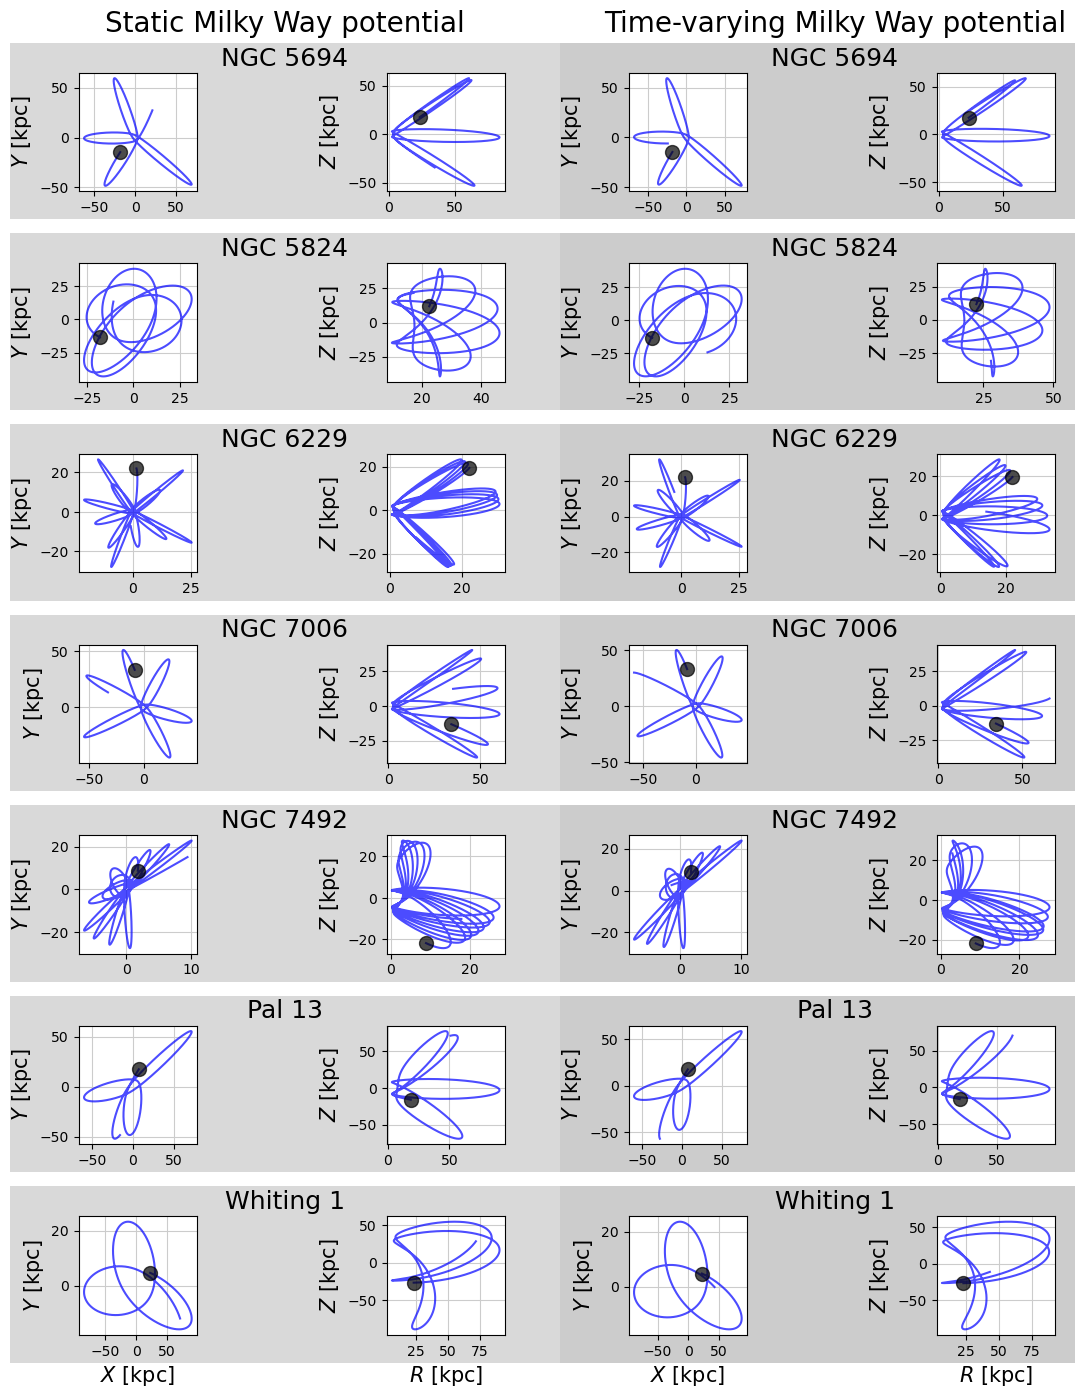

In [8]:
"""Create plots for GCs orbits v/s static and time-varying MW potential."""

r_11 = np.sqrt(testorbit11.orbs[0][0][:, 0]**2 +
               testorbit11.orbs[0][0][:, 1]**2)
r_12 = np.sqrt(testorbit21.orbs[0][0][:, 0]**2 +
               testorbit21.orbs[0][0][:, 1]**2)
r_21 = np.sqrt(testorbit11.orbs[1][0][:, 0]**2 +
               testorbit11.orbs[1][0][:, 1]**2)
r_22 = np.sqrt(testorbit21.orbs[1][0][:, 0]**2 +
               testorbit21.orbs[1][0][:, 1]**2)
r_31 = np.sqrt(testorbit11.orbs[2][0][:, 0]**2 +
               testorbit11.orbs[2][0][:, 1]**2)
r_32 = np.sqrt(testorbit21.orbs[2][0][:, 0]**2 +
               testorbit21.orbs[2][0][:, 1]**2)
r_41 = np.sqrt(testorbit11.orbs[3][0][:, 0]**2 +
               testorbit11.orbs[3][0][:, 1]**2)
r_42 = np.sqrt(testorbit21.orbs[3][0][:, 0]**2 +
               testorbit21.orbs[3][0][:, 1]**2)
r_51 = np.sqrt(testorbit11.orbs[4][0][:, 0]**2 +
               testorbit11.orbs[4][0][:, 1]**2)
r_52 = np.sqrt(testorbit21.orbs[4][0][:, 0]**2 +
               testorbit21.orbs[4][0][:, 1]**2)
r_61 = np.sqrt(testorbit11.orbs[5][0][:, 0]**2 +
               testorbit11.orbs[5][0][:, 1]**2)
r_62 = np.sqrt(testorbit21.orbs[5][0][:, 0]**2 +
               testorbit21.orbs[5][0][:, 1]**2)
r_71 = np.sqrt(testorbit11.orbs[6][0][:, 0]**2 +
               testorbit11.orbs[6][0][:, 1]**2)
r_72 = np.sqrt(testorbit21.orbs[6][0][:, 0]**2 +
               testorbit21.orbs[6][0][:, 1]**2)

fig = plt.figure(figsize=(11, 13.2))
# fig.suptitle('Orbits {} [Gyr] backwards in time\nfor NGC 5694'.format(t_fin),
# y=1.075, fontsize=28) # set global suptitle if desired

subfigs = fig.subfigures(1, 2)
subfigs[0].suptitle('Static Milky Way potential', y=1.025, size=20)
subfigs[1].suptitle('Time-varying Milky Way potential', y=1.025, size=20)

subfigsnest = subfigs[0].subfigures(7, 1, hspace=0.08)
subfigsnest[0].suptitle('NGC 5694', size=18)
subfigsnest[0].set_facecolor('0.85')
(ax11x, ax11r) = subfigsnest[0].subplots(1, 2)
subfigsnest[1].suptitle('NGC 5824', size=18)
subfigsnest[1].set_facecolor('0.85')
(ax21x, ax21r) = subfigsnest[1].subplots(1, 2)
subfigsnest[2].suptitle('NGC 6229', size=18)
subfigsnest[2].set_facecolor('0.85')
(ax31x, ax31r) = subfigsnest[2].subplots(1, 2)
subfigsnest[3].suptitle('NGC 7006', size=18)
subfigsnest[3].set_facecolor('0.85')
(ax41x, ax41r) = subfigsnest[3].subplots(1, 2)
subfigsnest[4].suptitle('NGC 7492', size=18)
subfigsnest[4].set_facecolor('0.85')
(ax51x, ax51r) = subfigsnest[4].subplots(1, 2)
subfigsnest[5].suptitle('Pal 13', size=18)
subfigsnest[5].set_facecolor('0.85')
(ax61x, ax61r) = subfigsnest[5].subplots(1, 2)
subfigsnest[6].suptitle('Whiting 1', size=18)
subfigsnest[6].set_facecolor('0.85')
(ax71x, ax71r) = subfigsnest[6].subplots(1, 2)

subfigsnest1 = subfigs[1].subfigures(7, 1, hspace=0.08)
subfigsnest1[0].suptitle('NGC 5694', size=18)
subfigsnest1[0].set_facecolor('0.80')
(ax12x, ax12r) = subfigsnest1[0].subplots(1, 2)
subfigsnest1[1].suptitle('NGC 5824', size=18)
subfigsnest1[1].set_facecolor('0.80')
(ax22x, ax22r) = subfigsnest1[1].subplots(1, 2)
subfigsnest1[2].suptitle('NGC 6229', size=18)
subfigsnest1[2].set_facecolor('0.80')
(ax32x, ax32r) = subfigsnest1[2].subplots(1, 2)
subfigsnest1[3].suptitle('NGC 7006', size=18)
subfigsnest1[3].set_facecolor('0.80')
(ax42x, ax42r) = subfigsnest1[3].subplots(1, 2)
subfigsnest1[4].suptitle('NGC 7492', size=18)
subfigsnest1[4].set_facecolor('0.80')
(ax52x, ax52r) = subfigsnest1[4].subplots(1, 2)
subfigsnest1[5].suptitle('Pal 13', size=18)
subfigsnest1[5].set_facecolor('0.80')
(ax62x, ax62r) = subfigsnest1[5].subplots(1, 2)
subfigsnest1[6].suptitle('Whiting 1', size=18)
subfigsnest1[6].set_facecolor('0.80')
(ax72x, ax72r) = subfigsnest1[6].subplots(1, 2)

plt.subplots_adjust(wspace=1.6)

ax11x.plot(testorbit11.orbs[0][0][:, 0], testorbit11.orbs[0][0][:, 1],
           color='b', alpha=0.7)
ax11x.plot(testorbit11.orbs[0][0][:, 0][0], testorbit11.orbs[0][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
# ax11x.set_xlabel(r"$X$ [kpc]", size=16)
ax11x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax11x.set_xlim((min_x-5, max_x+5))
# ax11x.set_ylim((min_y-5, max_y+5))
ax11x.grid(color='0.8')
ax11x.set_box_aspect(1)
ax11r.plot(r_11, testorbit11.orbs[0][0][:, 2], color='b', alpha=0.7)
ax11r.plot(r_11[0], testorbit11.orbs[0][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
# ax11r.set_xlabel(r"$R$ [kpc]", size=16)
ax11r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax11r.set_xlim((min_r-5, max_r+5))
# ax11r.set_ylim((min_z-5, max_z+5))
ax11r.grid(color='0.8')
ax11r.set_box_aspect(1)

ax12x.plot(testorbit21.orbs[0][0][:, 0], testorbit21.orbs[0][0][:, 1],
           color='b', alpha=0.7)
ax12x.plot(testorbit21.orbs[0][0][:, 0][0], testorbit21.orbs[0][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
# ax12x.set_xlabel(r"$X$ [kpc]", size=16)
ax12x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax12x.set_xlim((min_x-5, max_x+5))
# ax12x.set_ylim((min_y-5, max_y+5))
ax12x.grid(color='0.8')
ax12x.set_box_aspect(1)
ax12r.plot(r_12, testorbit21.orbs[0][0][:, 2], color='b', alpha=0.7)
ax12r.plot(r_12[0], testorbit21.orbs[0][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
# ax12r.set_xlabel(r"$R$ [kpc]", size=16)
ax12r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax12r.set_xlim((min_r-5, max_r+5))
# ax12r.set_ylim((min_z-5, max_z+5))
ax12r.grid(color='0.8')
ax12r.set_box_aspect(1)

ax21x.plot(testorbit11.orbs[1][0][:, 0], testorbit11.orbs[1][0][:, 1],
           color='b', alpha=0.7)
ax21x.plot(testorbit11.orbs[1][0][:, 0][0], testorbit11.orbs[1][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
# ax21x.set_xlabel(r"$X$ [kpc]", size=16)
ax21x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax21x.set_xlim((min_x-5, max_x+5))
# ax21x.set_ylim((min_y-5, max_y+5))
ax21x.grid(color='0.8')
ax21x.set_box_aspect(1)
ax21r.plot(r_21, testorbit11.orbs[1][0][:, 2], color='b', alpha=0.7)
ax21r.plot(r_21[0], testorbit11.orbs[1][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
# ax21r.set_xlabel(r"$R$ [kpc]", size=16)
ax21r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax21r.set_xlim((min_r-5, max_r+5))
# ax21r.set_ylim((min_z-5, max_z+5))
ax21r.grid(color='0.8')
ax21r.set_box_aspect(1)

ax22x.plot(testorbit21.orbs[1][0][:, 0], testorbit21.orbs[1][0][:, 1],
           color='b', alpha=0.7)
ax22x.plot(testorbit21.orbs[1][0][:, 0][0], testorbit21.orbs[1][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
# ax22x.set_xlabel(r"$X$ [kpc]", size=16)
ax22x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax22x.set_xlim((min_x-5, max_x+5))
# ax22x.set_ylim((min_y-5, max_y+5))
ax22x.grid(color='0.8')
ax22x.set_box_aspect(1)
ax22r.plot(r_22, testorbit21.orbs[1][0][:, 2], color='b', alpha=0.7)
ax22r.plot(r_22[0], testorbit21.orbs[1][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
# ax22r.set_xlabel(r"$R$ [kpc]", size=16)
ax22r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax22r.set_xlim((min_r-5, max_r+5))
# ax22r.set_ylim((min_z-5, max_z+5))
ax22r.grid(color='0.8')
ax22r.set_box_aspect(1)

ax31x.plot(testorbit11.orbs[2][0][:, 0], testorbit11.orbs[2][0][:, 1],
           color='b', alpha=0.7)
ax31x.plot(testorbit11.orbs[2][0][:, 0][0], testorbit11.orbs[2][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
# ax31x.set_xlabel(r"$X$ [kpc]", size=16)
ax31x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax31x.set_xlim((min_x-5, max_x+5))
# ax31x.set_ylim((min_y-5, max_y+5))
ax31x.grid(color='0.8')
ax31x.set_box_aspect(1)
ax31r.plot(r_31, testorbit11.orbs[2][0][:, 2], color='b', alpha=0.7)
ax31r.plot(r_31[0], testorbit11.orbs[2][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
# ax31r.set_xlabel(r"$R$ [kpc]", size=16)
ax31r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax31r.set_xlim((min_r-5, max_r+5))
# ax31r.set_ylim((min_z-5, max_z+5))
ax31r.grid(color='0.8')
ax31r.set_box_aspect(1)

ax32x.plot(testorbit21.orbs[2][0][:, 0], testorbit21.orbs[2][0][:, 1],
           color='b', alpha=0.7)
ax32x.plot(testorbit21.orbs[2][0][:, 0][0], testorbit21.orbs[2][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
# ax32x.set_xlabel(r"$X$ [kpc]", size=16)
ax32x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax32x.set_xlim((min_x-5, max_x+5))
# ax32x.set_ylim((min_y-5, max_y+5))
ax32x.grid(color='0.8')
ax32x.set_box_aspect(1)
ax32r.plot(r_32, testorbit21.orbs[2][0][:, 2], color='b', alpha=0.7)
ax32r.plot(r_32[0], testorbit21.orbs[2][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
# ax32r.set_xlabel(r"$R$ [kpc]", size=16)
ax32r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax32r.set_xlim((min_r-5, max_r+5))
# ax32r.set_ylim((min_z-5, max_z+5))
ax32r.grid(color='0.8')
ax32r.set_box_aspect(1)

ax41x.plot(testorbit11.orbs[3][0][:, 0], testorbit11.orbs[3][0][:, 1],
           color='b', alpha=0.7)
ax41x.plot(testorbit11.orbs[3][0][:, 0][0], testorbit11.orbs[3][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
# ax41x.set_xlabel(r"$X$ [kpc]", size=16)
ax41x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax41x.set_xlim((min_x-5, max_x+5))
# ax41x.set_ylim((min_y-5, max_y+5))
ax41x.grid(color='0.8')
ax41x.set_box_aspect(1)
ax41r.plot(r_41, testorbit11.orbs[3][0][:, 2], color='b', alpha=0.7)
ax41r.plot(r_41[0], testorbit11.orbs[3][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
# ax41r.set_xlabel(r"$R$ [kpc]", size=16)
ax41r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax41r.set_xlim((min_r-5, max_r+5))
# ax41r.set_ylim((min_z-5, max_z+5))
ax41r.grid(color='0.8')
ax41r.set_box_aspect(1)

ax42x.plot(testorbit21.orbs[3][0][:, 0], testorbit21.orbs[3][0][:, 1],
           color='b', alpha=0.7)
ax42x.plot(testorbit21.orbs[3][0][:, 0][0], testorbit21.orbs[3][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
# ax42x.set_xlabel(r"$X$ [kpc]", size=16)
ax42x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax42x.set_xlim((min_x-5, max_x+5))
# ax42x.set_ylim((min_y-5, max_y+5))
ax42x.grid(color='0.8')
ax42x.set_box_aspect(1)
ax42r.plot(r_42, testorbit21.orbs[3][0][:, 2], color='b', alpha=0.7)
ax42r.plot(r_42[0], testorbit21.orbs[3][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
# ax42r.set_xlabel(r"$R$ [kpc]", size=16)
ax42r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax42r.set_xlim((min_r-5, max_r+5))
# ax42r.set_ylim((min_z-5, max_z+5))
ax42r.grid(color='0.8')
ax42r.set_box_aspect(1)

ax51x.plot(testorbit11.orbs[4][0][:, 0], testorbit11.orbs[4][0][:, 1],
           color='b', alpha=0.7)
ax51x.plot(testorbit11.orbs[4][0][:, 0][0], testorbit11.orbs[4][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
# ax51x.set_xlabel(r"$X$ [kpc]", size=16)
ax51x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax51x.set_xlim((min_x-5, max_x+5))
# ax51x.set_ylim((min_y-5, max_y+5))
ax51x.grid(color='0.8')
ax51x.set_box_aspect(1)
ax51r.plot(r_51, testorbit11.orbs[4][0][:, 2], color='b', alpha=0.7)
ax51r.plot(r_51[0], testorbit11.orbs[4][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
# ax51r.set_xlabel(r"$R$ [kpc]", size=16)
ax51r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax51r.set_xlim((min_r-5, max_r+5))
# ax51r.set_ylim((min_z-5, max_z+5))
ax51r.grid(color='0.8')
ax51r.set_box_aspect(1)

ax52x.plot(testorbit21.orbs[4][0][:, 0], testorbit21.orbs[4][0][:, 1],
           color='b', alpha=0.7)
ax52x.plot(testorbit21.orbs[4][0][:, 0][0], testorbit21.orbs[4][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
# ax52x.set_xlabel(r"$X$ [kpc]", size=16)
ax52x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax52x.set_xlim((min_x-5, max_x+5))
# ax52x.set_ylim((min_y-5, max_y+5))
ax52x.grid(color='0.8')
ax52x.set_box_aspect(1)
ax52r.plot(r_52, testorbit21.orbs[4][0][:, 2], color='b', alpha=0.7)
ax52r.plot(r_52[0], testorbit21.orbs[4][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
# ax52r.set_xlabel(r"$R$ [kpc]", size=16)
ax52r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax52r.set_xlim((min_r-5, max_r+5))
# ax52r.set_ylim((min_z-5, max_z+5))
ax52r.grid(color='0.8')
ax52r.set_box_aspect(1)

ax61x.plot(testorbit11.orbs[5][0][:, 0], testorbit11.orbs[5][0][:, 1],
           color='b', alpha=0.7)
ax61x.plot(testorbit11.orbs[5][0][:, 0][0], testorbit11.orbs[5][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
# ax61x.set_xlabel(r"$X$ [kpc]", size=16)
ax61x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax61x.set_xlim((min_x-5, max_x+5))
# ax61x.set_ylim((min_y-5, max_y+5))
ax61x.grid(color='0.8')
ax61x.set_box_aspect(1)
ax61r.plot(r_61, testorbit11.orbs[5][0][:, 2], color='b', alpha=0.7)
ax61r.plot(r_61[0], testorbit11.orbs[5][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
# ax61r.set_xlabel(r"$R$ [kpc]", size=16)
ax61r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax61r.set_xlim((min_r-5, max_r+5))
# ax61r.set_ylim((min_z-5, max_z+5))
ax61r.grid(color='0.8')
ax61r.set_box_aspect(1)

ax62x.plot(testorbit21.orbs[5][0][:, 0], testorbit21.orbs[5][0][:, 1],
           color='b', alpha=0.7)
ax62x.plot(testorbit21.orbs[5][0][:, 0][0], testorbit21.orbs[5][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
# ax62x.set_xlabel(r"$X$ [kpc]", size=16)
ax62x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax62x.set_xlim((min_x-5, max_x+5))
# ax62x.set_ylim((min_y-5, max_y+5))
ax62x.grid(color='0.8')
ax62x.set_box_aspect(1)
ax62r.plot(r_62, testorbit21.orbs[5][0][:, 2], color='b', alpha=0.7)
ax62r.plot(r_62[0], testorbit21.orbs[5][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
# ax62r.set_xlabel(r"$R$ [kpc]", size=16)
ax62r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax62r.set_xlim((min_r-5, max_r+5))
# ax62r.set_ylim((min_z-5, max_z+5))
ax62r.grid(color='0.8')
ax62r.set_box_aspect(1)

ax71x.plot(testorbit11.orbs[6][0][:, 0], testorbit11.orbs[6][0][:, 1],
           color='b', alpha=0.7)
ax71x.plot(testorbit11.orbs[6][0][:, 0][0], testorbit11.orbs[6][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
ax71x.set_xlabel(r"$X$ [kpc]", size=15)
ax71x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax71x.set_xlim((min_x-5, max_x+5))
# ax71x.set_ylim((min_y-5, max_y+5))
ax71x.grid(color='0.8')
ax71x.set_box_aspect(1)
ax71r.plot(r_71, testorbit11.orbs[6][0][:, 2], color='b', alpha=0.7)
ax71r.plot(r_71[0], testorbit11.orbs[6][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
ax71r.set_xlabel(r"$R$ [kpc]", size=15)
ax71r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax71r.set_xlim((min_r-5, max_r+5))
# ax71r.set_ylim((min_z-5, max_z+5))
ax71r.grid(color='0.8')
ax71r.set_box_aspect(1)

ax72x.plot(testorbit21.orbs[6][0][:, 0], testorbit21.orbs[6][0][:, 1],
           color='b', alpha=0.7)
ax72x.plot(testorbit21.orbs[6][0][:, 0][0], testorbit21.orbs[6][0][:, 1][0],
           'ko', markersize=10, alpha=0.7)
ax72x.set_xlabel(r"$X$ [kpc]", size=15)
ax72x.set_ylabel(r"$Y$ [kpc]", size=15)
# ax72x.set_xlim((min_x-5, max_x+5))
# ax72x.set_ylim((min_y-5, max_y+5))
ax72x.grid(color='0.8')
ax72x.set_box_aspect(1)
ax72r.plot(r_72, testorbit21.orbs[6][0][:, 2], color='b', alpha=0.7)
ax72r.plot(r_72[0], testorbit21.orbs[6][0][:, 2][0], 'ko', markersize=10,
           alpha=0.7)
ax72r.set_xlabel(r"$R$ [kpc]", size=15)
ax72r.set_ylabel(r"$Z$ [kpc]", size=15)
# ax72r.set_xlim((min_r-5, max_r+5))
# ax72r.set_ylim((min_z-5, max_z+5))
ax72r.grid(color='0.8')
ax72r.set_box_aspect(1)

plt.savefig("Images/Orbits/orbits_static_time-varying_MW.png",
            bbox_inches='tight')

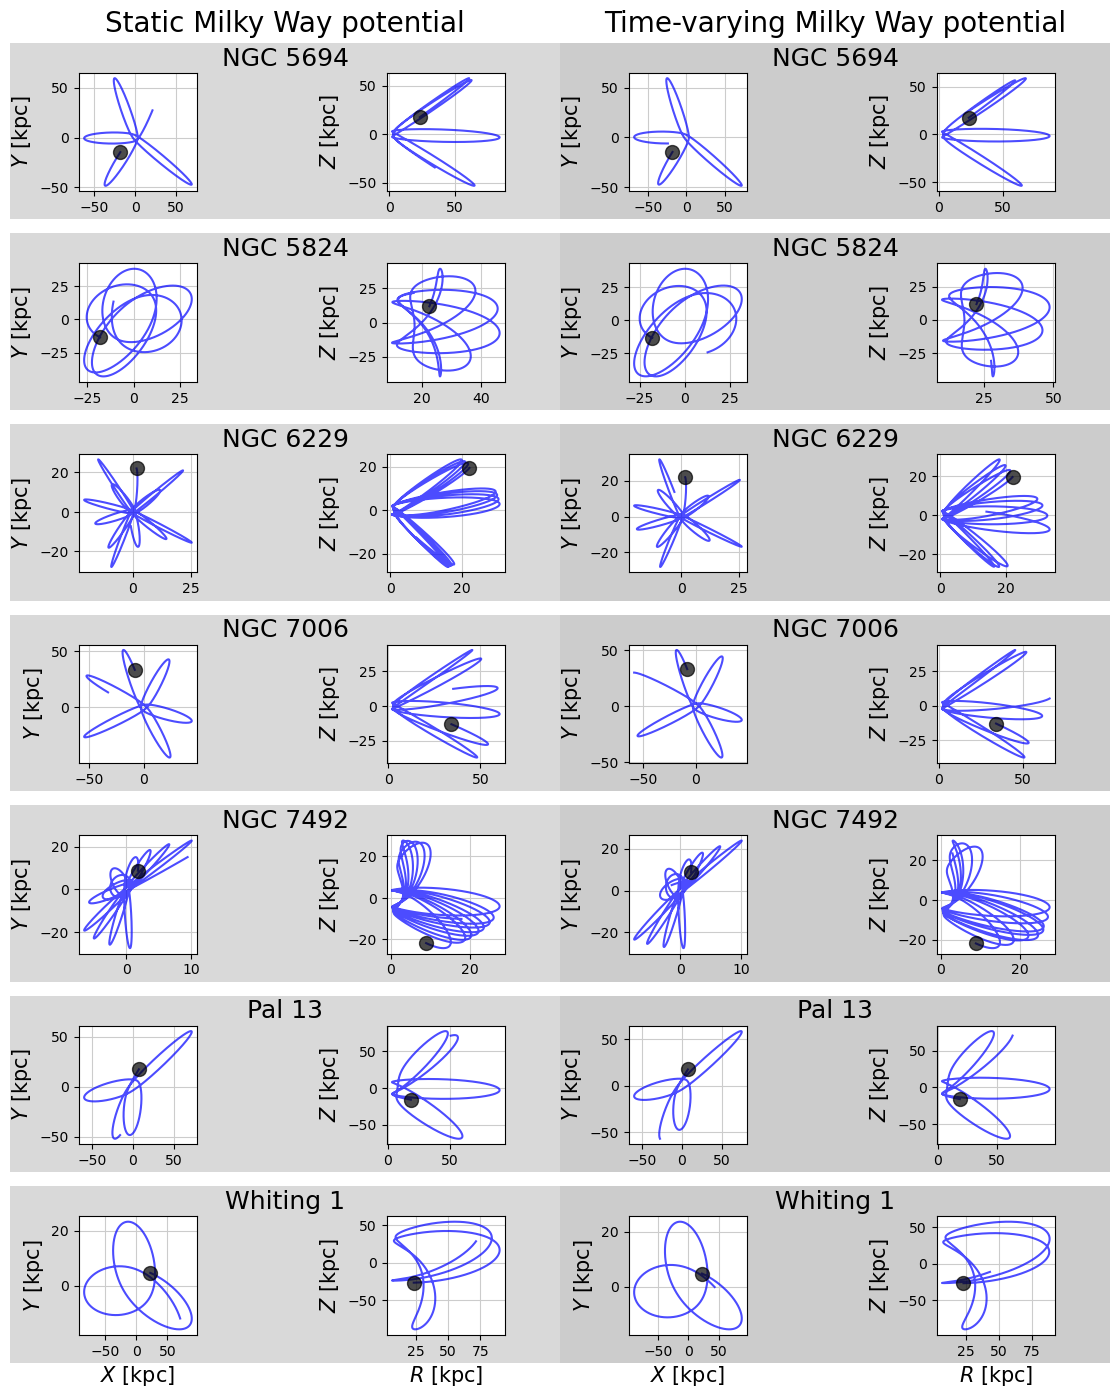

In [11]:
"""Same plots as the cell above, with a code optimized by ChatGPT."""

# Compute radii for all datasets in a loop
radii_1, radii_2 = [], []
for i in range(7):
    r1 = np.sqrt(testorbit11.orbs[i][0][:, 0]**2 +
                 testorbit11.orbs[i][0][:, 1]**2)
    r2 = np.sqrt(testorbit21.orbs[i][0][:, 0]**2 +
                 testorbit21.orbs[i][0][:, 1]**2)
    radii_1.append(r1)
    radii_2.append(r2)

# Set up main figure and subfigures
fig = plt.figure(figsize=(11, 13.2))
subfigs = fig.subfigures(1, 2)
subfigs[0].suptitle('Static Milky Way potential', y=1.025, size=20)
subfigs[1].suptitle('Time-varying Milky Way potential', y=1.025, size=20)

# Cluster data titles and subfigures into loops
clusters = ["NGC 5694", "NGC 5824", "NGC 6229", "NGC 7006", "NGC 7492",
            "Pal 13", "Whiting 1"]
facecolors = ["0.85", "0.80"]  # alternate facecolors

for i, cluster in enumerate(clusters):
    # Set up each cluster's subplot
    subfig_0 = subfigs[0].subfigures(7, 1, hspace=0.08)[i]
    subfig_0.suptitle(cluster, size=18)
    subfig_0.set_facecolor(facecolors[0])
    ax_x, ax_r = subfig_0.subplots(1, 2)

    subfig_1 = subfigs[1].subfigures(7, 1, hspace=0.08)[i]
    subfig_1.suptitle(cluster, size=18)
    subfig_1.set_facecolor(facecolors[1])
    ax_x_2, ax_r_2 = subfig_1.subplots(1, 2)

    # Plot orbits and radii for each dataset
    ax_x.plot(testorbit11.orbs[i][0][:, 0], testorbit11.orbs[i][0][:, 1],
              color='b', alpha=0.7)
    ax_x.plot(testorbit11.orbs[i][0][:, 0][0], testorbit11.orbs[i][0][:, 1][0],
              'ko', markersize=10, alpha=0.7)
    ax_x.set_ylabel(r"$Y$ [kpc]", size=15)
    ax_x.grid(color='0.8')
    ax_x.set_box_aspect(1)
    ax_r.plot(radii_1[i], testorbit11.orbs[i][0][:, 2], color='b', alpha=0.7)
    ax_r.plot(radii_1[i][0], testorbit11.orbs[i][0][:, 2][0], 'ko',
              markersize=10, alpha=0.7)
    ax_r.set_ylabel(r"$Z$ [kpc]", size=15)
    ax_r.grid(color='0.8')
    ax_r.set_box_aspect(1)

    ax_x_2.plot(testorbit21.orbs[i][0][:, 0], testorbit21.orbs[i][0][:, 1],
                color='b', alpha=0.7)
    ax_x_2.plot(testorbit21.orbs[i][0][:, 0][0],
                testorbit21.orbs[i][0][:, 1][0], 'ko', markersize=10,
                alpha=0.7)
    ax_x_2.set_ylabel(r"$Y$ [kpc]", size=15)
    ax_x_2.grid(color='0.8')
    ax_x_2.set_box_aspect(1)
    ax_r_2.plot(radii_2[i], testorbit21.orbs[i][0][:, 2], color='b', alpha=0.7)
    ax_r_2.plot(radii_2[i][0], testorbit21.orbs[i][0][:, 2][0], 'ko',
                markersize=10, alpha=0.7)
    ax_r_2.set_ylabel(r"$Z$ [kpc]", size=15)
    ax_r_2.grid(color='0.8')
    ax_r_2.set_box_aspect(1)
ax_x.set_xlabel(r"$X$ [kpc]", size=15)
ax_r.set_xlabel(r"$R$ [kpc]", size=15)
ax_x_2.set_xlabel(r"$X$ [kpc]", size=15)
ax_r_2.set_xlabel(r"$R$ [kpc]", size=15)

plt.subplots_adjust(wspace=1.6)
plt.savefig("Images/Orbits/orbits_static_time-varying_MW.png",
            bbox_inches='tight')


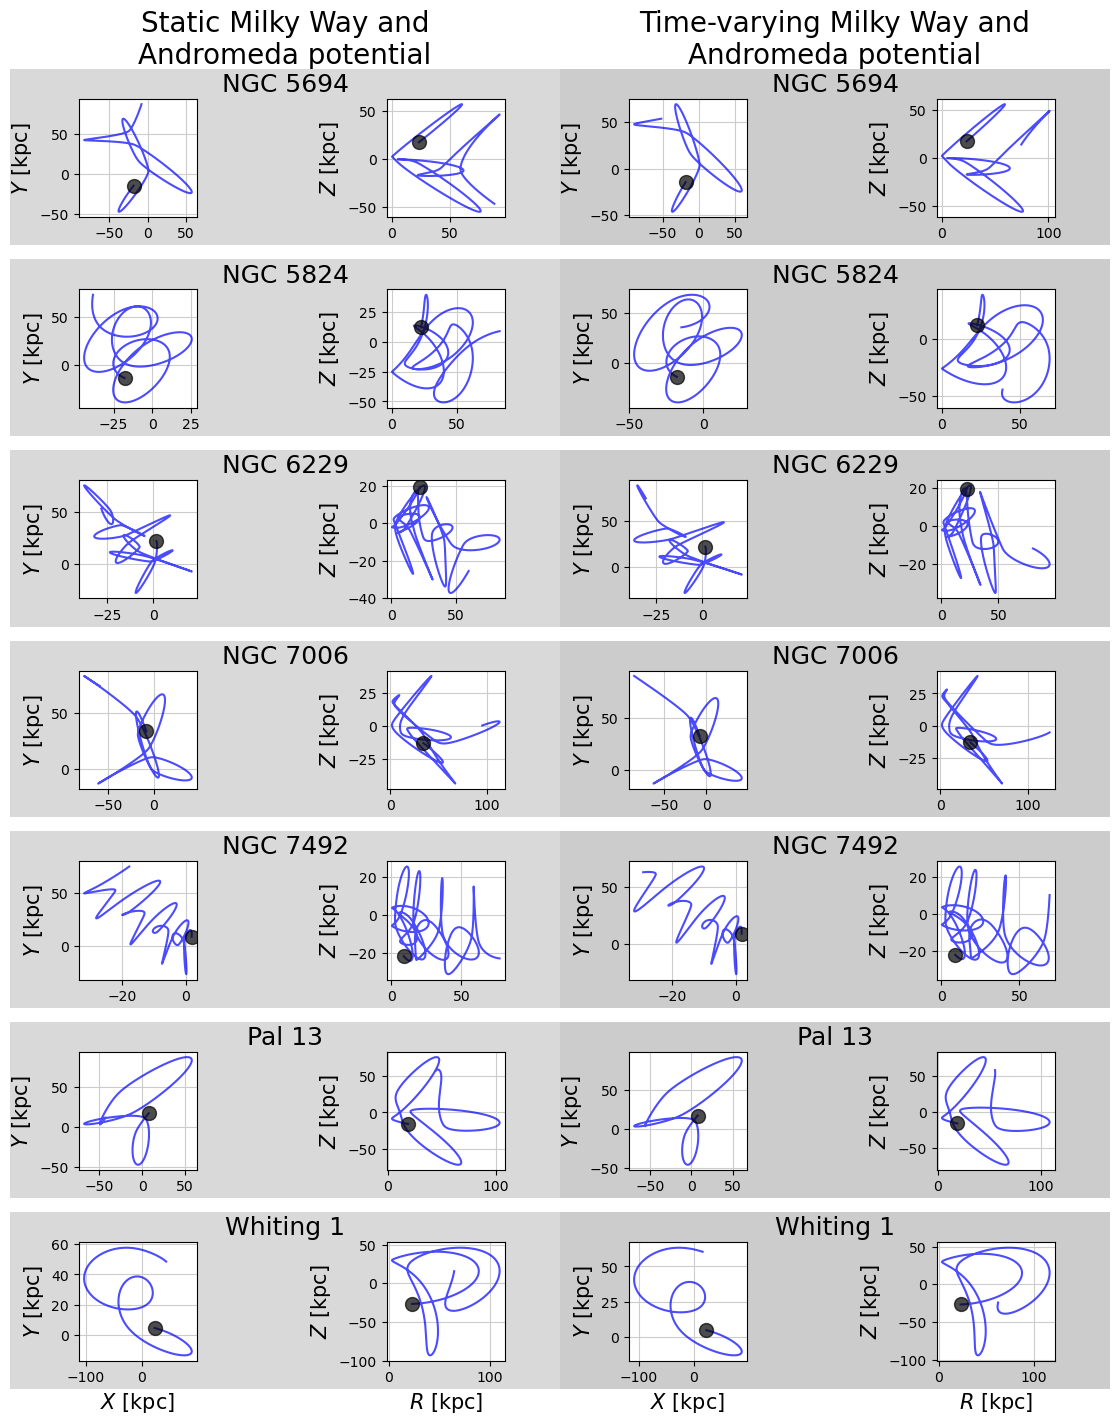

In [12]:
"""Create plots for GCs orbits v/s static and time-varying MW-M31 potential.

ChatGPT optimized code is used.
"""

# Compute galactocentric distance for all datasets in a loop
radii_1, radii_2 = [], []
for i in range(7):
    r1 = np.sqrt(testorbit31.orbs[i][0][:, 0]**2 +
                 testorbit31.orbs[i][0][:, 1]**2)
    r2 = np.sqrt(testorbit41.orbs[i][0][:, 0]**2 +
                 testorbit41.orbs[i][0][:, 1]**2)
    radii_1.append(r1)
    radii_2.append(r2)

# Set up main figure and subfigures
fig = plt.figure(figsize=(11, 13.2))
subfigs = fig.subfigures(1, 2)
subfigs[0].suptitle('Static Milky Way and\nAndromeda potential', y=1.045,
                    size=20)
subfigs[1].suptitle('Time-varying Milky Way and\nAndromeda potential',
                    y=1.045, size=20)

# Cluster data titles and subfigures into loops
clusters = ["NGC 5694", "NGC 5824", "NGC 6229", "NGC 7006", "NGC 7492",
            "Pal 13", "Whiting 1"]
facecolors = ["0.85", "0.80"]  # alternate facecolors

for i, cluster in enumerate(clusters):
    # Set up each cluster's subplot
    subfig_0 = subfigs[0].subfigures(7, 1, hspace=0.08)[i]
    subfig_0.suptitle(cluster, size=18)
    subfig_0.set_facecolor(facecolors[0])
    ax_x, ax_r = subfig_0.subplots(1, 2)

    subfig_1 = subfigs[1].subfigures(7, 1, hspace=0.08)[i]
    subfig_1.suptitle(cluster, size=18)
    subfig_1.set_facecolor(facecolors[1])
    ax_x_2, ax_r_2 = subfig_1.subplots(1, 2)

    # Plot orbits and radii for each dataset
    ax_x.plot(testorbit31.orbs[i][0][:, 0], testorbit31.orbs[i][0][:, 1],
              color='b', alpha=0.7)
    ax_x.plot(testorbit31.orbs[i][0][:, 0][0], testorbit31.orbs[i][0][:, 1][0],
              'ko', markersize=10, alpha=0.7)
    ax_x.set_ylabel(r"$Y$ [kpc]", size=15)
    ax_x.grid(color='0.8')
    ax_x.set_box_aspect(1)
    ax_r.plot(radii_1[i], testorbit31.orbs[i][0][:, 2], color='b', alpha=0.7)
    ax_r.plot(radii_1[i][0], testorbit31.orbs[i][0][:, 2][0], 'ko',
              markersize=10, alpha=0.7)
    ax_r.set_ylabel(r"$Z$ [kpc]", size=15)
    ax_r.grid(color='0.8')
    ax_r.set_box_aspect(1)

    ax_x_2.plot(testorbit41.orbs[i][0][:, 0], testorbit41.orbs[i][0][:, 1],
                color='b', alpha=0.7)
    ax_x_2.plot(testorbit41.orbs[i][0][:, 0][0],
                testorbit41.orbs[i][0][:, 1][0], 'ko', markersize=10,
                alpha=0.7)
    ax_x_2.set_ylabel(r"$Y$ [kpc]", size=15)
    ax_x_2.grid(color='0.8')
    ax_x_2.set_box_aspect(1)
    ax_r_2.plot(radii_2[i], testorbit41.orbs[i][0][:, 2], color='b', alpha=0.7)
    ax_r_2.plot(radii_2[i][0], testorbit41.orbs[i][0][:, 2][0], 'ko',
                markersize=10, alpha=0.7)
    ax_r_2.set_ylabel(r"$Z$ [kpc]", size=15)
    ax_r_2.grid(color='0.8')
    ax_r_2.set_box_aspect(1)
ax_x.set_xlabel(r"$X$ [kpc]", size=15)
ax_r.set_xlabel(r"$R$ [kpc]", size=15)
ax_x_2.set_xlabel(r"$X$ [kpc]", size=15)
ax_r_2.set_xlabel(r"$R$ [kpc]", size=15)

plt.subplots_adjust(wspace=1.6)
plt.savefig("Images/Orbits/orbits_static_time-varying_MW-M31.png",
            bbox_inches='tight')


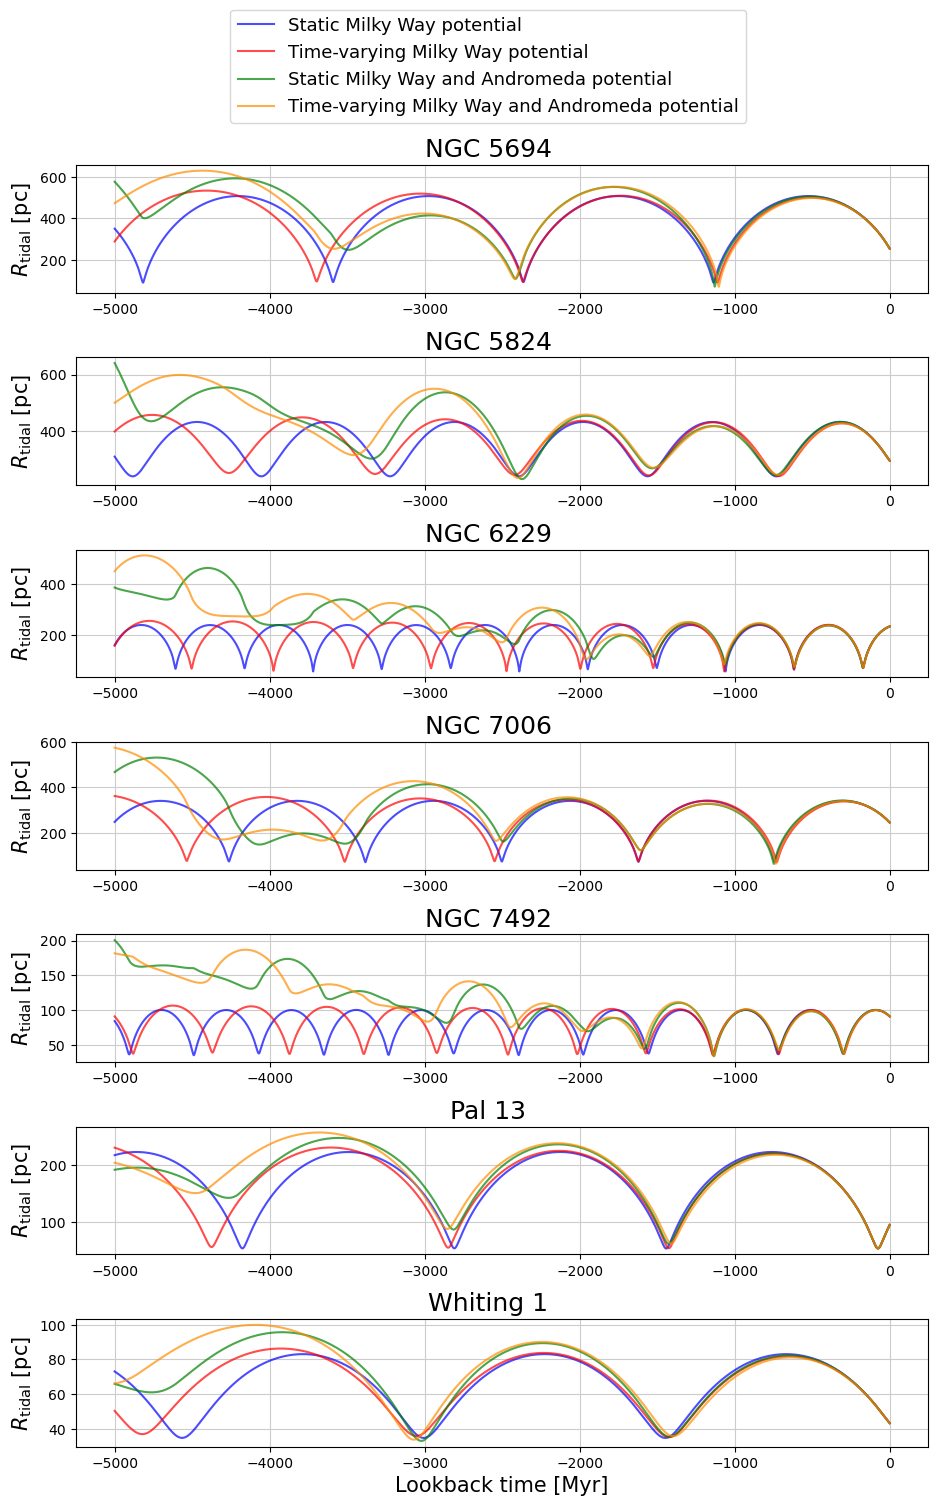

In [14]:
"""Create graphs for GCs tidal radii v/s time, by potential type."""

colors = ['b', 'r', 'g', 'darkorange']

m_i1 = 3.83 * 10**5
m_i2 = 7.79 * 10**5
m_i3 = 2.91 * 10**5
m_i4 = 2.29 * 10**5
m_i5 = 2.58 * 10**4
m_i6 = 2.74 * 10**4
m_i7 = 1.37 * 10**3


def distance(orbs):
    """Compute the distance from MW center to the GC."""
    d = (orbs[:, 0]**2 + orbs[:, 1]**2 + orbs[:, 2]**2)**0.5
    return d


d_11 = distance(testorbit11.orbs[0][0])
d_12 = distance(testorbit21.orbs[0][0])
d_13 = distance(testorbit31.orbs[0][0])
d_14 = distance(testorbit41.orbs[0][0])
d_21 = distance(testorbit11.orbs[1][0])
d_22 = distance(testorbit21.orbs[1][0])
d_23 = distance(testorbit31.orbs[1][0])
d_24 = distance(testorbit41.orbs[1][0])
d_31 = distance(testorbit11.orbs[2][0])
d_32 = distance(testorbit21.orbs[2][0])
d_33 = distance(testorbit31.orbs[2][0])
d_34 = distance(testorbit41.orbs[2][0])
d_41 = distance(testorbit11.orbs[3][0])
d_42 = distance(testorbit21.orbs[3][0])
d_43 = distance(testorbit31.orbs[3][0])
d_44 = distance(testorbit41.orbs[3][0])
d_51 = distance(testorbit11.orbs[4][0])
d_52 = distance(testorbit21.orbs[4][0])
d_53 = distance(testorbit31.orbs[4][0])
d_54 = distance(testorbit41.orbs[4][0])
d_61 = distance(testorbit11.orbs[5][0])
d_62 = distance(testorbit21.orbs[5][0])
d_63 = distance(testorbit31.orbs[5][0])
d_64 = distance(testorbit41.orbs[5][0])
d_71 = distance(testorbit11.orbs[6][0])
d_72 = distance(testorbit21.orbs[6][0])
d_73 = distance(testorbit31.orbs[6][0])
d_74 = distance(testorbit41.orbs[6][0])

r_tid_11 = rtidal_MWnfw(m_i1, d_11)*1000
r_tid_12 = rtidal_MWnfw(m_i1, d_12)*1000
r_tid_13 = rtidal_MWnfw(m_i1, d_13)*1000
r_tid_14 = rtidal_MWnfw(m_i1, d_14)*1000
r_tid_21 = rtidal_MWnfw(m_i2, d_21)*1000
r_tid_22 = rtidal_MWnfw(m_i2, d_22)*1000
r_tid_23 = rtidal_MWnfw(m_i2, d_23)*1000
r_tid_24 = rtidal_MWnfw(m_i2, d_24)*1000
r_tid_31 = rtidal_MWnfw(m_i3, d_31)*1000
r_tid_32 = rtidal_MWnfw(m_i3, d_32)*1000
r_tid_33 = rtidal_MWnfw(m_i3, d_33)*1000
r_tid_34 = rtidal_MWnfw(m_i3, d_34)*1000
r_tid_41 = rtidal_MWnfw(m_i4, d_41)*1000
r_tid_42 = rtidal_MWnfw(m_i4, d_42)*1000
r_tid_43 = rtidal_MWnfw(m_i4, d_43)*1000
r_tid_44 = rtidal_MWnfw(m_i4, d_44)*1000
r_tid_51 = rtidal_MWnfw(m_i5, d_51)*1000
r_tid_52 = rtidal_MWnfw(m_i5, d_52)*1000
r_tid_53 = rtidal_MWnfw(m_i5, d_53)*1000
r_tid_54 = rtidal_MWnfw(m_i5, d_54)*1000
r_tid_61 = rtidal_MWnfw(m_i6, d_61)*1000
r_tid_62 = rtidal_MWnfw(m_i6, d_62)*1000
r_tid_63 = rtidal_MWnfw(m_i6, d_63)*1000
r_tid_64 = rtidal_MWnfw(m_i6, d_64)*1000
r_tid_71 = rtidal_MWnfw(m_i7, d_71)*1000
r_tid_72 = rtidal_MWnfw(m_i7, d_72)*1000
r_tid_73 = rtidal_MWnfw(m_i7, d_73)*1000
r_tid_74 = rtidal_MWnfw(m_i7, d_74)*1000

fig = plt.figure(figsize=(11, 13.2))

subfigsnest = fig.subfigures(7, 1, hspace=0.16)
subfigsnest[0].suptitle('NGC 5694', size=18, y=1.04375)
ax1 = subfigsnest[0].subplots(1, 1)
subfigsnest[1].suptitle('NGC 5824', size=18, y=1.04375)
ax2 = subfigsnest[1].subplots(1, 1)
subfigsnest[2].suptitle('NGC 6229', size=18, y=1.04375)
ax3 = subfigsnest[2].subplots(1, 1)
subfigsnest[3].suptitle('NGC 7006', size=18, y=1.04375)
ax4 = subfigsnest[3].subplots(1, 1)
subfigsnest[4].suptitle('NGC 7492', size=18, y=1.04375)
ax5 = subfigsnest[4].subplots(1, 1)
subfigsnest[5].suptitle('Pal 13', size=18, y=1.04375)
ax6 = subfigsnest[5].subplots(1, 1)
subfigsnest[6].suptitle('Whiting 1', size=18, y=1.04375)
ax7 = subfigsnest[6].subplots(1, 1)

plt.subplots_adjust(wspace=0.4)

ax1.plot(testorbit11.paramtime[3], r_tid_11, color=colors[0], alpha=0.7,
         label='Static Milky Way potential')
ax1.plot(testorbit21.paramtime[3], r_tid_12, color=colors[1], alpha=0.7,
         label='Time-varying Milky Way potential')
ax1.plot(testorbit31.paramtime[3], r_tid_13, color=colors[2], alpha=0.7,
         label='Static Milky Way and Andromeda potential')
ax1.plot(testorbit41.paramtime[3], r_tid_14, color=colors[3], alpha=0.7,
         label='Time-varying Milky Way and Andromeda potential')
# ax1.set_xlabel('Lookback time [Myr]', size=16)
ax1.set_ylabel(r"$R_{\rm tidal}$ [pc]", size=15)
ax1.grid(color='0.8')
# ax1.set_aspect(8.5, 'box')
subfigsnest[0].legend(loc='upper center', fontsize=13, borderaxespad=-7.5)

ax2.plot(testorbit11.paramtime[3], r_tid_21, color=colors[0], alpha=0.7)
ax2.plot(testorbit21.paramtime[3], r_tid_22, color=colors[1], alpha=0.7)
ax2.plot(testorbit31.paramtime[3], r_tid_23, color=colors[2], alpha=0.7)
ax2.plot(testorbit41.paramtime[3], r_tid_24, color=colors[3], alpha=0.7)
# ax2.set_xlabel('Lookback time [Myr]', size=16)
ax2.set_ylabel(r"$R_{\rm tidal}$ [pc]", size=15)
ax2.grid(color='0.8')
# ax2.set_aspect(8.5, 'box')

ax3.plot(testorbit11.paramtime[3], r_tid_31, color=colors[0], alpha=0.7)
ax3.plot(testorbit21.paramtime[3], r_tid_32, color=colors[1], alpha=0.7)
ax3.plot(testorbit31.paramtime[3], r_tid_33, color=colors[2], alpha=0.7)
ax3.plot(testorbit41.paramtime[3], r_tid_34, color=colors[3], alpha=0.7)
# ax3.set_xlabel('Lookback time [Myr]', size=16)
ax3.set_ylabel(r"$R_{\rm tidal}$ [pc]", size=15)
ax3.grid(color='0.8')
# ax3.set_aspect(8.5, 'box')

ax4.plot(testorbit11.paramtime[3], r_tid_41, color=colors[0], alpha=0.7)
ax4.plot(testorbit21.paramtime[3], r_tid_42, color=colors[1], alpha=0.7)
ax4.plot(testorbit31.paramtime[3], r_tid_43, color=colors[2], alpha=0.7)
ax4.plot(testorbit41.paramtime[3], r_tid_44, color=colors[3], alpha=0.7)
# ax4.set_xlabel('Lookback time [Myr]', size=16)
ax4.set_ylabel(r"$R_{\rm tidal}$ [pc]", size=15)
ax4.grid(color='0.8')
# ax4.set_aspect(8.5, 'box')

ax5.plot(testorbit11.paramtime[3], r_tid_51, color=colors[0], alpha=0.7)
ax5.plot(testorbit21.paramtime[3], r_tid_52, color=colors[1], alpha=0.7)
ax5.plot(testorbit31.paramtime[3], r_tid_53, color=colors[2], alpha=0.7)
ax5.plot(testorbit41.paramtime[3], r_tid_54, color=colors[3], alpha=0.7)
# ax5.set_xlabel('Lookback time [Myr]', size=16)
ax5.set_ylabel(r"$R_{\rm tidal}$ [pc]", size=15)
ax5.grid(color='0.8')
# ax5.set_aspect(8.5, 'box')

ax6.plot(testorbit11.paramtime[3], r_tid_61, color=colors[0], alpha=0.7)
ax6.plot(testorbit21.paramtime[3], r_tid_62, color=colors[1], alpha=0.7)
ax6.plot(testorbit31.paramtime[3], r_tid_63, color=colors[2], alpha=0.7)
ax6.plot(testorbit41.paramtime[3], r_tid_64, color=colors[3], alpha=0.7)
# ax6.set_xlabel('Lookback time [Myr]', size=16)
ax6.set_ylabel(r"$R_{\rm tidal}$ [pc]", size=15)
ax6.grid(color='0.8')
# ax6.set_aspect(8.5, 'box')

ax7.plot(testorbit11.paramtime[3], r_tid_71, color=colors[0], alpha=0.7)
ax7.plot(testorbit21.paramtime[3], r_tid_72, color=colors[1], alpha=0.7)
ax7.plot(testorbit31.paramtime[3], r_tid_73, color=colors[2], alpha=0.7)
ax7.plot(testorbit41.paramtime[3], r_tid_74, color=colors[3], alpha=0.7)
ax7.set_xlabel('Lookback time [Myr]', size=15)
ax7.set_ylabel(r"$R_{\rm tidal}$ [pc]", size=15)
ax7.grid(color='0.8')
# ax7.set_aspect(8.5, 'box')

plt.savefig("Images/Tidal_Radius/tidalradius_all.png", bbox_inches='tight')

In [15]:
import matplotlib.pyplot as plt

# Define colors and masses
colors = ['b', 'r', 'g', 'darkorange']
masses = [3.83e5, 7.79e5, 2.91e5, 2.29e5, 2.58e4, 2.74e4, 1.37e3]

# Function to calculate distance
def distance(orbs):
    """Compute the distance from MW center to the GC."""
    return (orbs[:, 0]**2 + orbs[:, 1]**2 + orbs[:, 2]**2)**0.5

# Function to calculate tidal radius
def compute_rtidal(mass, distances):
    return [rtidal_MWnfw(mass, d) * 1000 for d in distances]

# Calculate distances for each orbit and time
distances = {
    (i, j): distance(orbit.orbs[i][0])
    for i, orbit in enumerate([testorbit11, testorbit21, testorbit31, testorbit41])
    for j in range(7)
}

# Calculate tidal radii for each mass and distance
tidal_radii = {
    (j, i): compute_rtidal(masses[j], distances[(i, j)])
    for j in range(len(masses))
    for i in range(4)
}

# Set up figure and subfigures
fig = plt.figure(figsize=(11, 13.2))
subfigs = fig.subfigures(len(masses), 1, hspace=0.16)
titles = ['NGC 5694', 'NGC 5824', 'NGC 6229', 'NGC 7006', 'NGC 7492', 'Pal 13', 'Whiting 1']

# Plot each GC in its subplot
for j, ax in enumerate(subfigs):
    ax.suptitle(titles[j], size=18, y=1.04375)
    ax1 = ax.subplots(1, 1)
    for i, color in enumerate(colors):
        ax1.plot(testorbit11.paramtime[3], tidal_radii[(j, i)], color=color, alpha=0.7, label=f'Potential {i + 1}')
    
    ax1.set_ylabel(r"$R_{\rm tidal}$ [pc]", size=15)
    ax1.grid(color='0.8')
    if j == len(masses) - 1:
        ax1.set_xlabel('Lookback time [Myr]', size=15)
    if j == 0:
        ax.legend(loc='upper center', fontsize=13, borderaxespad=-7.5)

plt.subplots_adjust(wspace=0.4)
plt.savefig("Images/Tidal_Radius/tidalradius_all.png", bbox_inches='tight')

TypeError: 'numpy.float64' object does not support item assignment